In [20]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [21]:
X, y = make_regression(n_samples=100, n_features=1,n_targets=1,n_informative=1,noise=20,random_state=13)

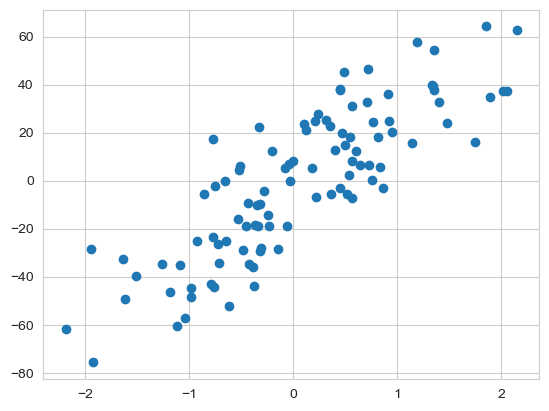

In [22]:
plt.scatter(X,y)

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [25]:
lr.fit(X_train,y_train)
lr.intercept_, lr.coef_

(-2.2710144261783825, array([28.12597332]))

In [26]:
y_pred = lr.predict(X_test)

r2_score(y_test,y_pred)

0.6345158782661012

In [27]:
class GDescent:
    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
    
    def fit(self,X,y):
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b) * X.ravel() )
            
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
            
        print(self.b,self.m)
        
    def predict(self,X):
        return (self.m * X) + self.b

In [28]:
gd = GDescent(0.001,50)

In [29]:
gd.fit(X_train,y_train)

-2.3004574196824854 28.159367347119066


In [30]:
y_pred = gd.predict(X_test)
r2_score(y_test,y_pred)

0.6343842836315579